In [2]:
name = "OLIVIA MASELLA"
# PHYS 349 Final Project

In [27]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as PathEffects

In [4]:
class Cell:
    
    def __init__(self, values=[0,1], direction='right'):
        self.values = values
        self.direction = direction

In [99]:
class CellularAutomata:
    
    def __init__(self,  initial_conditions, rules, cell=Cell(), boundaries='Periodic'):
        self.lattice = initial_conditions
        self.cell = cell
        self.boundaries = boundaries
        self.dim = initial_conditions.squeeze().ndim
        self.len = len(initial_conditions.squeeze())
        self.rules = rules
        
    def run(self, n_steps=10, end_display=True):
        if end_display:
            display_lattice = np.zeros((n_steps+1, self.len))
            display_lattice[0,:] = self.lattice
        for n in range(1,n_steps+1):
            # Generate temp_lattice for storage
            temp_lattice = np.zeros_like(self.lattice)
            
            # Loop through x's and y's
            #[::(-1)**n]
            for y in np.arange((self.len-1)*(self.dim-1)+1):
                for x in np.arange(self.len):
                    # Store the directional value at (x,y)
                    temp_val = self.lattice[y,x]
                    
                    # Determine whether this point should move to next_pos
                    check, next_pos = self.rules((x,y), self.dim, temp_lattice, self.lattice)
                    
                    # Move the point
                    if check:
                        temp_lattice[y,x] = 0
                        temp_lattice[next_pos[1],next_pos[0]] = temp_val
                        
                    # Don't move the point
                    elif self.lattice[y,x] != 0:
                        temp_lattice[y,x] = temp_val
                    
                    else:
                        continue
                        
            self.lattice = temp_lattice
            if end_display:
                display_lattice[n,:] = temp_lattice
            else:
                self.display(temp_lattice, f"Traffic after {n} steps")
        if end_display:
            self.display(display_lattice, f"Traffic after {n_steps} steps")
                        
        
    def display(self, current_lattice=None, title=''):
        """Plot the 

        Args:
           title : of plot (default '')
        """
        if current_lattice is None:
            current_lattice = self.lattice
        fix, ax = plt.subplots(figsize=(10,7))
        cmap = ListedColormap(['white', 'red','blue','green','purple'])
        ax.imshow(current_lattice, cmap=cmap, vmin=0, vmax=4)
        if self.dim == 1:
            ax.set_ylabel('Steps')
#         plt.colorbar(ticks=[0, 1])
        ax.set_title(title)
        for i in range(len(current_lattice[:,0])):
            for j in range(len(current_lattice[0,:])):
                label = ''
                if current_lattice[i,j] == 1:
                    label = '→'
                elif current_lattice[i,j] == 2:
                    label = '↓'
                elif current_lattice[i,j] == 3:
                    label = '←'
                elif current_lattice[i,j] == 4:
                    label = '↑'
                text = ax.text(j, i, label, ha="center", va="center", color="w", size=25)
                text.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])

        plt.show()
        

In [95]:
def traffic_rules(loc, dimensions, temp_lattice, lattice):
    '''
    direction = 1: right, 2: down, 3: left, 4: up
    '''
    x = loc[0]
    y = loc[1]
    
    df = 0 # direction factor if there is no car
    if lattice[y,x] in [1,2]: # direction factor if going right or down
        df = +1
    elif lattice[y,x] in [3,4]: # direction factor if going left or up
        df = -1
    
    
    if dimensions == 1:
        # Set the next position/neighbour location
        next_pos = x + df
        if (x + df) == len(lattice[y,:]):
            next_pos = 0
        if (x + df) == -1:
            next_pos = len(lattice[y,:])
        
        if lattice[y,x] in [1,3] and lattice[y,next_pos] == 0 and temp_lattice[y,next_pos] == 0:
            return True, (next_pos, y)
        else:
            return False, (next_pos, y)
        
        
    if dimensions == 2:
        # Movement in y
        if lattice[y,x] in [2,4]:
            # Set the next position/neighbour location
            next_pos = y + df
            if (y + df) == len(lattice[:,x]):
                next_pos = 0
            if (y + df) == -1:
                next_pos = len(lattice[:,x]) - 1 

            if lattice[next_pos,x] == 0 and temp_lattice[next_pos,x] == 0:
                return True, (x, next_pos)
            else:
                return False, (x, next_pos)
        
        # Movement in x
        elif lattice[y,x] in [1,3]:
            # Set the next position/neighbour location
            next_pos = x + df
            if (x + df) == len(lattice[y,:]):
                next_pos = 0
            if (x + df) == -1:
                next_pos = len(lattice[y,:]) - 1

            if lattice[y,next_pos] == 0 and temp_lattice[y,next_pos] == 0:
                return True, (next_pos, y)
            else:
                return False, (next_pos, y)
           
        # Not a car!
        else:
            return False, (0,0)

0 0
Car found at 0, 0
Moving car at 0, 0; with val 1 to (1, 0)
1 0
2 0
Car found at 2, 0
Moving car at 2, 0; with val 1 to (3, 0)
3 0
4 0
Car found at 4, 0
Moving car at 4, 0; with val 1 to (5, 0)
5 0
5 0
Car found at 5, 0
Moving car at 5, 0; with val 1 to (0, 0)
4 0
3 0
Car found at 3, 0
Moving car at 3, 0; with val 1 to (4, 0)
2 0
1 0
Car found at 1, 0
Moving car at 1, 0; with val 1 to (2, 0)
0 0
0 0
Car found at 0, 0
Moving car at 0, 0; with val 1 to (1, 0)
1 0
2 0
Car found at 2, 0
Moving car at 2, 0; with val 1 to (3, 0)
3 0
4 0
Car found at 4, 0
Moving car at 4, 0; with val 1 to (5, 0)
5 0
5 0
Car found at 5, 0
Moving car at 5, 0; with val 1 to (0, 0)
4 0
3 0
Car found at 3, 0
Moving car at 3, 0; with val 1 to (4, 0)
2 0
1 0
Car found at 1, 0
Moving car at 1, 0; with val 1 to (2, 0)
0 0
0 0
Car found at 0, 0
Moving car at 0, 0; with val 1 to (1, 0)
1 0
2 0
Car found at 2, 0
Moving car at 2, 0; with val 1 to (3, 0)
3 0
4 0
Car found at 4, 0
Moving car at 4, 0; with val 1 to (5, 0)

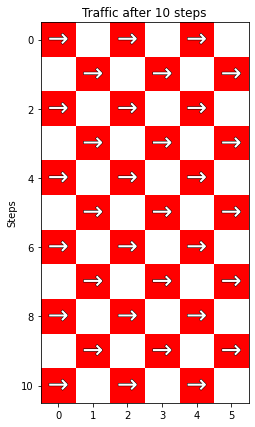

0 0
Car found at 0, 0
1 0
Car found at 1, 0
2 0
Car found at 2, 0
3 0
Car found at 3, 0
Moving car at 3, 0; with val 1 to (4, 0)
4 0
5 0
6 0
Car found at 6, 0
Moving car at 6, 0; with val 1 to (7, 0)
7 0
7 0
Car found at 7, 0
6 0
5 0
4 0
Car found at 4, 0
Moving car at 4, 0; with val 1 to (5, 0)
3 0
2 0
Car found at 2, 0
Moving car at 2, 0; with val 1 to (3, 0)
1 0
Car found at 1, 0
0 0
Car found at 0, 0
0 0
Car found at 0, 0
1 0
Car found at 1, 0
Moving car at 1, 0; with val 1 to (2, 0)
2 0
3 0
Car found at 3, 0
Moving car at 3, 0; with val 1 to (4, 0)
4 0
5 0
Car found at 5, 0
Moving car at 5, 0; with val 1 to (6, 0)
6 0
7 0
Car found at 7, 0
7 0
Car found at 7, 0
6 0
Car found at 6, 0
5 0
4 0
Car found at 4, 0
Moving car at 4, 0; with val 1 to (5, 0)
3 0
2 0
Car found at 2, 0
Moving car at 2, 0; with val 1 to (3, 0)
1 0
0 0
Car found at 0, 0
Moving car at 0, 0; with val 1 to (1, 0)
0 0
1 0
Car found at 1, 0
Moving car at 1, 0; with val 1 to (2, 0)
2 0
3 0
Car found at 3, 0
Moving ca

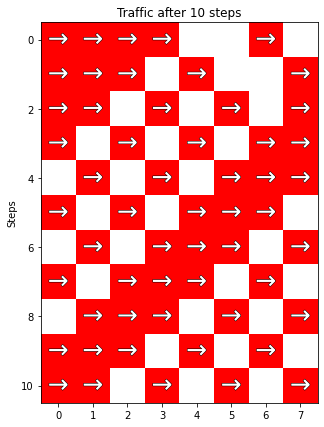

0 0
Car found at 0, 0
Moving car at 0, 0; with val 1 to (1, 0)
1 0
2 0
3 0
4 0
5 0
6 0
7 0
7 0
6 0
5 0
4 0
3 0
2 0
1 0
Car found at 1, 0
Moving car at 1, 0; with val 1 to (2, 0)
0 0
0 0
1 0
2 0
Car found at 2, 0
Moving car at 2, 0; with val 1 to (3, 0)
3 0
4 0
5 0
6 0
7 0
7 0
6 0
5 0
4 0
3 0
Car found at 3, 0
Moving car at 3, 0; with val 1 to (4, 0)
2 0
1 0
0 0
0 0
1 0
2 0
3 0
4 0
Car found at 4, 0
Moving car at 4, 0; with val 1 to (5, 0)
5 0
6 0
7 0
7 0
6 0
5 0
Car found at 5, 0
Moving car at 5, 0; with val 1 to (6, 0)
4 0
3 0
2 0
1 0
0 0
0 0
1 0
2 0
3 0
4 0
5 0
6 0
Car found at 6, 0
Moving car at 6, 0; with val 1 to (7, 0)
7 0
7 0
Car found at 7, 0
Moving car at 7, 0; with val 1 to (0, 0)
6 0
5 0
4 0
3 0
2 0
1 0
0 0
0 0
Car found at 0, 0
Moving car at 0, 0; with val 1 to (1, 0)
1 0
2 0
3 0
4 0
5 0
6 0
7 0
7 0
6 0
5 0
4 0
3 0
2 0
1 0
Car found at 1, 0
Moving car at 1, 0; with val 1 to (2, 0)
0 0


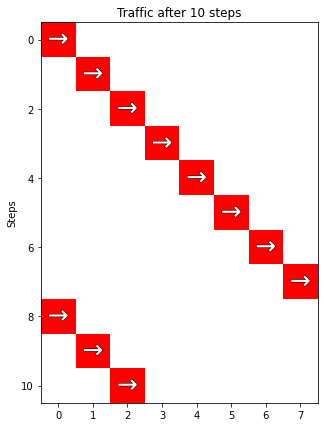

In [89]:


init_lattice = np.array([[1,0,1,0,1,0]])
traffic = CellularAutomata(init_lattice, traffic_rules)
traffic.run()

init_lattice = np.array([[1,1,1,1,0,0,1,0]])
traffic = CellularAutomata(init_lattice, traffic_rules)
traffic.run()

init_lattice = np.array([[1,0,0,0,0,0,0,0]])
traffic = CellularAutomata(init_lattice, traffic_rules)
traffic.run()

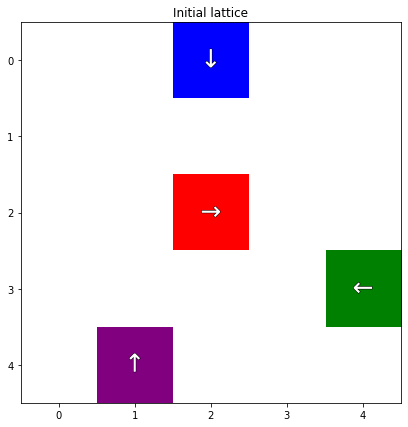

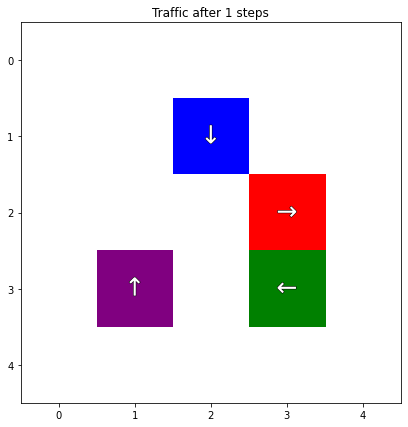

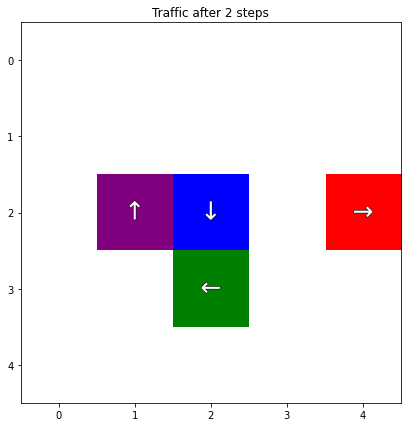

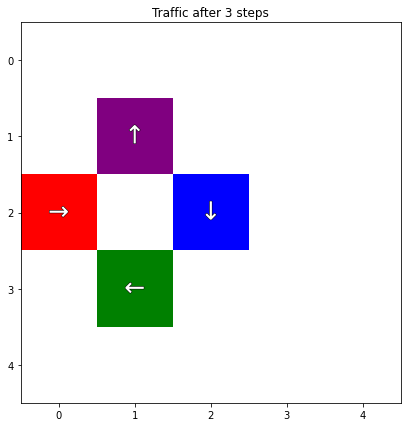

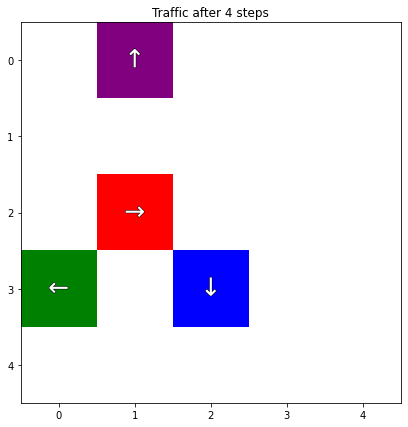

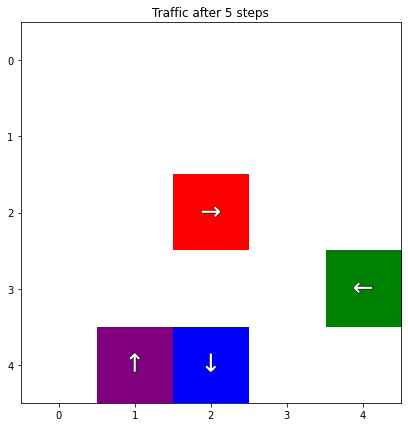

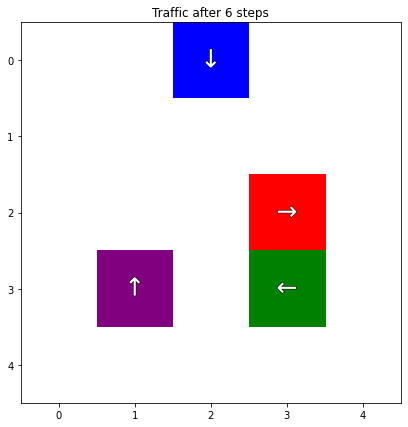

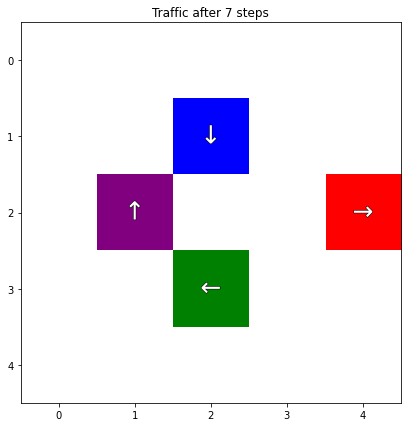

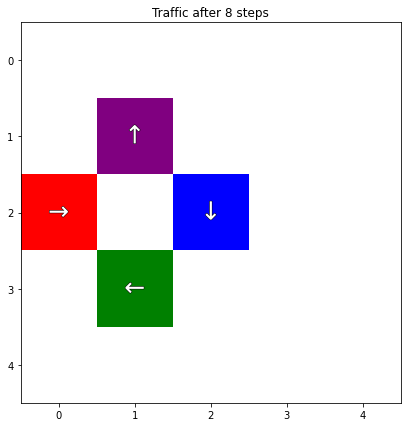

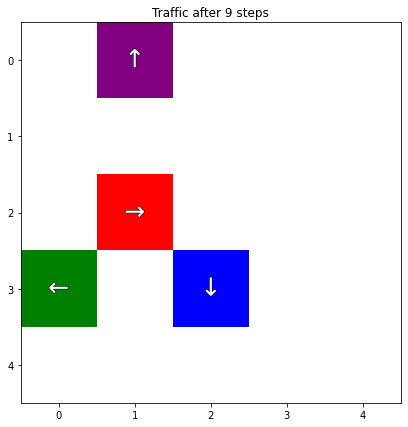

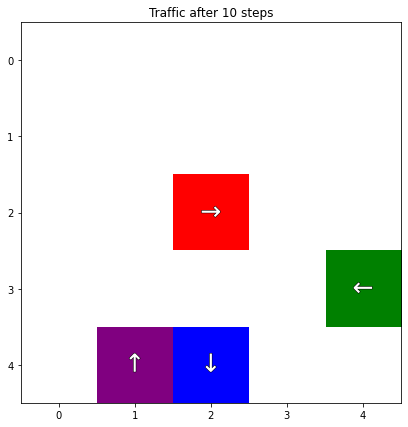

In [103]:
init_lattice = np.array([[0,0,2,0,0],
                         [0,0,0,0,0],
                         [0,0,1,0,0],
                         [0,0,0,0,3],
                         [0,4,0,0,0]])

# init_lattice = np.random.choice([0,1,2],(20,20),p=[0.98,0.01,0.01])
traffic = CellularAutomata(init_lattice, traffic_rules)
traffic.display(title='Initial lattice')
traffic.run(n_steps = 10, end_display=False)
